In [4]:
#Import dependencies 
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd

In [5]:
df = pd.read_csv("D:\python programs\dspl\\archive\ADANIPORTS.csv") 
df1 = df

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

Figure(1000x400)


<AxesSubplot:xlabel='Open'>

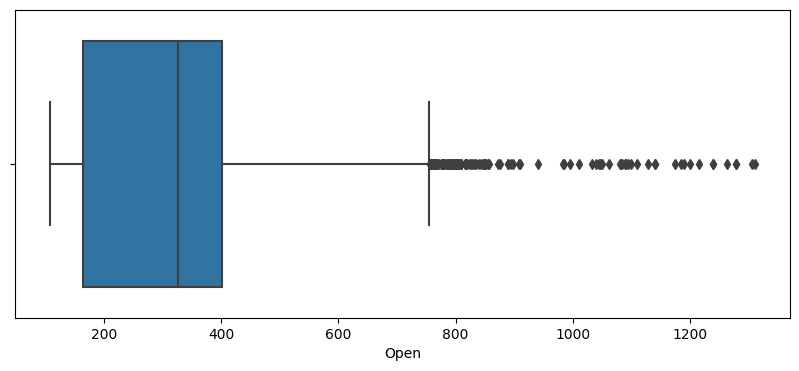

In [7]:
#Checking outliers using boxplot
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "Open", data = df1) 

Figure(1000x400)


<AxesSubplot:xlabel='Close'>

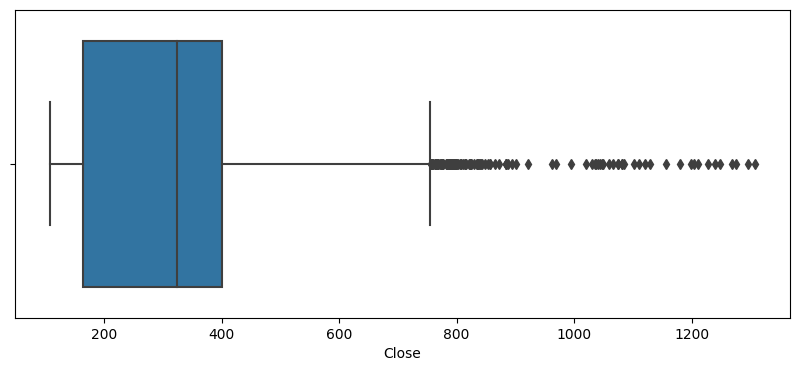

In [8]:
#Checking outliers using boxplot
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "Close", data = df1) 

In [9]:
# finding IQR
percentile25 = df1['Open'].quantile(0.25)
percentile75 = df1['Open'].quantile(0.75)
iqr = percentile75 - percentile25

In [10]:
# finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [11]:
# finding outliers using iqr
df1[df1['Open'] > upper_limit]
df1[df1['Open'] < lower_limit]

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble


In [12]:
# trimming outliers
new_df = df1[df1['Open'] < upper_limit]
new_df.shape

(3196, 15)

In [13]:
print(new_df.columns)

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')


C:\Users\himad\AppData\Local\Temp\ipykernel_11432\2673409898.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Open'])
C:\Users\himad\AppData\Local\Temp\ipykernel_11432\2673409898.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Open'])


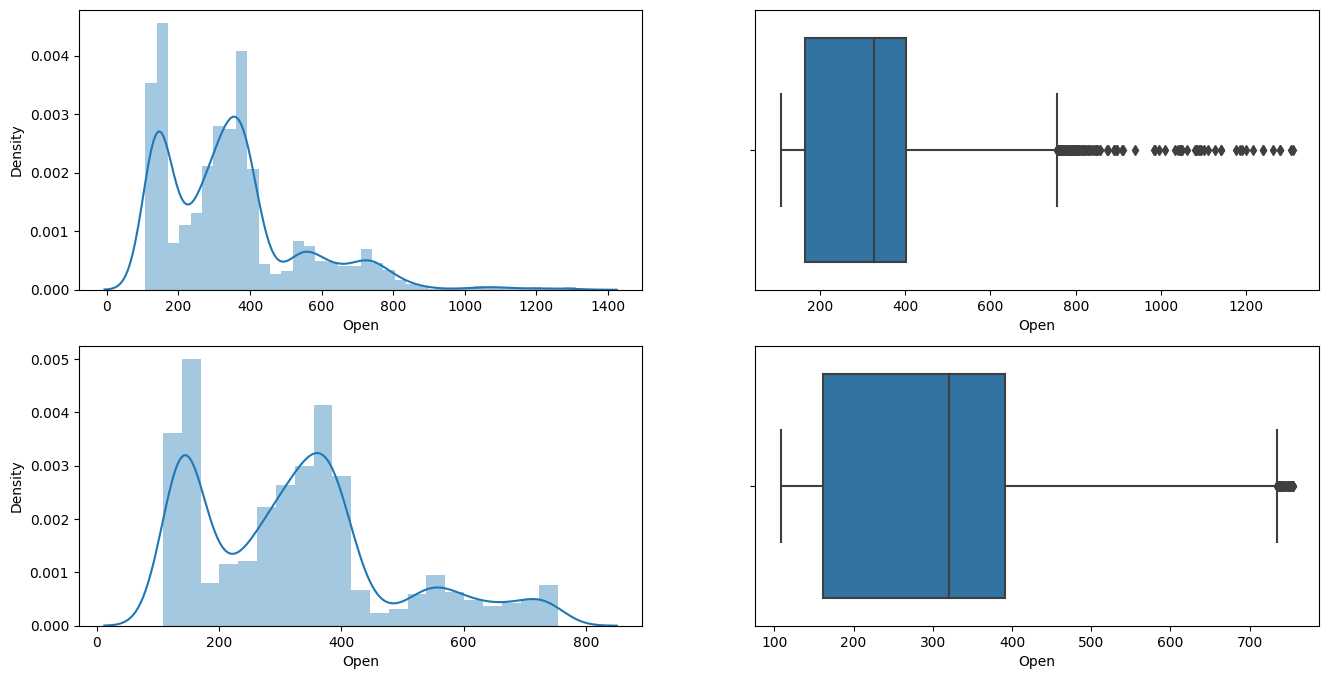

In [14]:
# compare plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df1['Open'])
plt.subplot(2,2,2)
sns.boxplot(x="Open",data=df1)
plt.subplot(2,2,3)
sns.distplot(new_df['Open'])
plt.subplot(2,2,4)
sns.boxplot(x="Open",data=new_df)
plt.show()

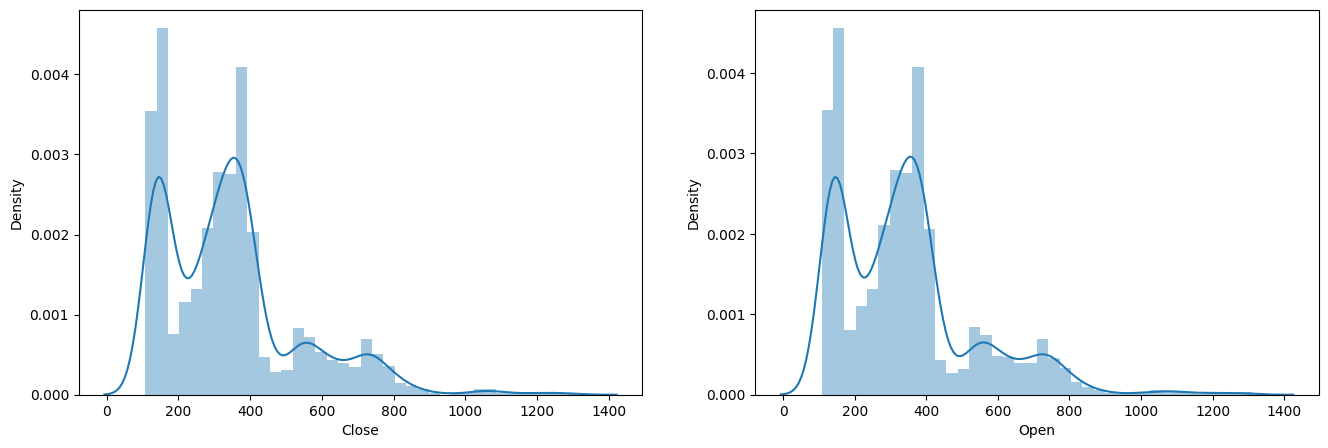

In [20]:
# plot distributions for features
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df1['Close'])
plt.subplot(1,2,2)
sns.distplot(df1['Open'])
plt.show()

In [16]:
# finding boundary values for Open using z-score
print("Highest allowed",df1['Open'].mean() + 3*df1['Open'].std())
print("Lowest allowed",df1['Open'].mean() - 3*df1['Open'].std())

Highest allowed 925.6229965490143
Lowest allowed -236.09695801800893


In [17]:
# finding outliers for Open
df1[(df1['Open'] > 925.62299) | (df1['Open'] < -236.0969)]

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.0,874.00,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.0,922.00,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741
5,2007-12-04,MUNDRAPORT,EQ,969.30,985.00,1056.0,976.00,1049.00,1041.45,1015.39,4849250,4.923867e+14,NaN,1537667,0.3171
6,2007-12-05,MUNDRAPORT,EQ,1041.45,1061.00,1099.5,1050.00,1084.00,1082.45,1082.79,2848209,3.084010e+14,NaN,904260,0.3175
7,2007-12-06,MUNDRAPORT,EQ,1082.45,1089.00,1109.7,1051.00,1090.10,1081.30,1087.03,1749516,1.901771e+14,NaN,825691,0.4720
8,2007-12-07,MUNDRAPORT,EQ,1081.30,1100.00,1134.0,1078.00,1100.00,1102.40,1106.57,2247904,2.487465e+14,NaN,697763,0.3104
9,2007-12-10,MUNDRAPORT,EQ,1102.40,1110.00,1110.0,1061.10,1073.55,1075.40,1080.38,1012350,1.093727e+14,NaN,417514,0.4124
10,2007-12-11,MUNDRAPORT,EQ,1075.40,1081.00,1089.0,1041.00,1046.00,1047.65,1067.80,810464,8.654156e+13,NaN,415191,0.5123
11,2007-12-12,MUNDRAPORT,EQ,1047.65,1032.00,1065.0,1016.00,1036.90,1036.80,1043.92,744799,7.775137e+13,NaN,363848,0.4885
12,2007-12-13,MUNDRAPORT,EQ,1036.80,1040.00,1150.0,1030.25,1131.15,1129.95,1109.09,3067687,3.402339e+14,NaN,1040076,0.3390


In [18]:
# Trimming of outliers for bmi
new_df1 = df1[(df1['Open'] < 925.62299) & (df1['Open'] > -236.0969)]
new_df1

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.0,1050.00,770.00,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.0,914.75,841.00,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.0,958.00,890.00,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
38,2008-01-22,MUNDRAPORT,EQ,825.05,700.0,810.00,660.05,739.0,735.55,703.20,546161,3.840611e+13,NaN,376194,0.6888
39,2008-01-23,MUNDRAPORT,EQ,735.55,760.0,881.90,760.00,862.2,857.00,818.67,535462,4.383653e+13,NaN,283881,0.5302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.0,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.0,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.0,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.2,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942


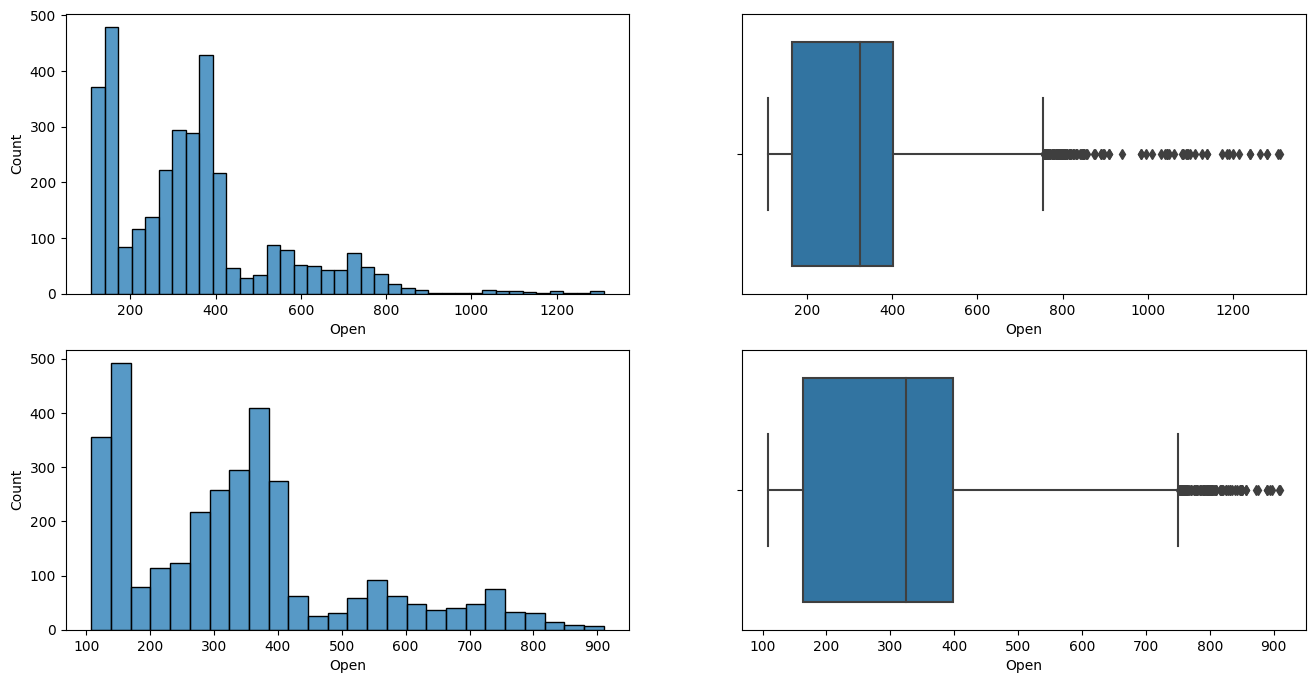

In [19]:
# compare plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df1['Open'])
plt.subplot(2,2,2)
sns.boxplot(x="Open",data=df1)
plt.subplot(2,2,3)
sns.histplot(new_df1['Open'])
plt.subplot(2,2,4)
sns.boxplot(x="Open",data=new_df1)
plt.show()